# ORIE 4580/5580/5581 Assignment 5

#### Students: Junliang Wu (jw2727) and Kevin Wang (kw677)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday, October 13, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).




---
---


# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

___
## Ans.


___

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

___

## Ans.



___
___

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

___

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?
___


## Ans.
It depends on two cases. Firstly, when 0 <= Y < 40, it implies $N_{i}$ is less than 40. So, when Y = k where k is from 0 to 30, it follows the same distribution which mentioned in the question. So, $P(Y = y) = P(Y = k) = P(N = k) = (1-p)^{k}*p$. Second, when Y = 40, it implies $N_{i}$>=40. So, $P(Y = y) = P(N_{i}>=40) = 1 - P(N_{i} <= 40) = 1 - ((1-p)^{0}*p+(1-p)^{1}*p+...+(1-p)^{39}*p)$

___

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.
___

## Ans.


For the likelihood function $L(p) = \prod{(1-p)^{Y_{i}}*p}*\prod{(1-p)^{40}}$. So $log(L(p)) = \sum{Y_{i}log(1-p)+log(p)} + \sum{40log(1-p)}$
Now, $\frac{d(logL(p))}{dp} = \sum{(\frac{-Y_{i}}{1-p}+\frac{1}{p})} - \sum{\frac{40}{1-p}} = 0$. The first summation is about Yi < 40 and the second one is for Yi = 40. Then, simplifying the equation, we have $\frac{d(logL(p))}{dp} = summation * \frac{-1}{1-p} + n_{uncensored} * \frac{1}{p} - n_{censored} * \frac{40}{1-p} = 0$ By using the code below, we know that summation = 1037, n_uncensored = 66, n_censored = 34. By solving the equation, we know p = 0.0268

In [99]:
import numpy as np
import pandas as pd
data = pd.read_csv('Soup_sales_data.csv')
uncensored = data[data['Y']<40]['Y']
censored = data[data['Y'] == 40]
n_uncensored = len(uncensored)
n_censored = len(censored)
summation = sum(uncensored)
n_uncensored, n_censored, summation

(66, 34, 1037)

___
___

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

___

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.
___

The probability that at least two people share a birthday within a group of n people is defined in the function birthday_probability. We first calculate the probability that no two people share the same birthday and subtract from 1.

## Ans.

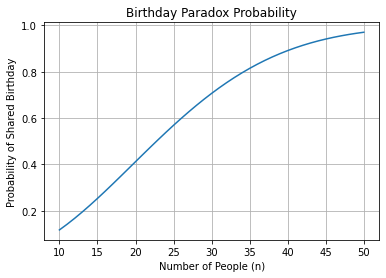

In [3]:
import matplotlib.pyplot as plt

def birthday_probability(n):
    p_no_shared_birthday = 1.0
    for i in range(n):
        p_no_shared_birthday *= (365 - i) / 365
    return 1 - p_no_shared_birthday

n_values = list(range(10, 51))
probabilities = [birthday_probability(n) for n in n_values]

plt.plot(n_values, probabilities)
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of Shared Birthday')
plt.title('Birthday Paradox Probability')
plt.grid(True)
plt.show()

___
**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.
___

## Ans.

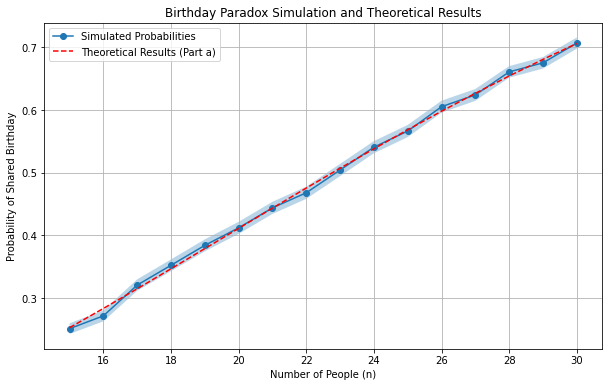

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np

def has_shared_birthday(n):
    # Generate n random birthdays (1 to 365)
    birthdays = [random.randint(1, 365) for _ in range(n)]
    # Check for shared birthdays
    return len(birthdays) != len(set(birthdays))

def simulate_birthday_paradox(n, num_simulations):
    results = []
    has_or_no = []
    for _ in range(num_simulations):
        shared_birthday = has_shared_birthday(n)
        results.append(shared_birthday)
        if shared_birthday == True:
            has_or_no.append(1)
        else:
            has_or_no.append(0)
            
    
    # Calculate the probability estimate
    probability_estimate = sum(results) / num_simulations
    # Calculate the 95% confidence interval
    lower_bound = probability_estimate - 1.96 * np.std(has_or_no)/np.sqrt(num_simulations)
    upper_bound = probability_estimate + 1.96 * np.std(has_or_no)/np.sqrt(num_simulations)
    
    return probability_estimate, lower_bound, upper_bound

# Values of n for simulation
n_values = list(range(15, 31))
num_simulations = 10000  # You can increase this for more accurate results

# Simulate and collect results
probability_estimates = []
lower_bounds = []
upper_bounds = []
for n in n_values:
    prob, lower, upper = simulate_birthday_paradox(n, num_simulations)
    probability_estimates.append(prob)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Theoretical results from part (a)
theoretical_results = [birthday_probability(n) for n in n_values]

# Plot the estimates, 95% CIs, and theoretical results
plt.figure(figsize=(10, 6))
plt.plot(n_values, probability_estimates, label='Simulated Probabilities', marker='o')
plt.fill_between(n_values, lower_bounds, upper_bounds, alpha=0.3)
plt.plot(n_values, theoretical_results, label='Theoretical Results (Part a)', linestyle='--', color='red')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of Shared Birthday')
plt.title('Birthday Paradox Simulation and Theoretical Results')
plt.legend()
plt.grid(True)
plt.show()





---

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)
___

## Ans.

In [5]:
# For loading the data, you can use ""
# Please note that the txt file needs to be placed in the same folder with the ipynb file.
# To extract the counts column as a vector, use "df.values[:,1]"

In [9]:
df

,date,count
0,101,1482
1,102,1213
2,103,1220
3,104,1319
4,105,1262
...,...,...
360,1227,1256
361,1228,1426
362,1229,1332
363,1230,1355


In [16]:
len(empirical_probs)
len(empirical_cdf)

365

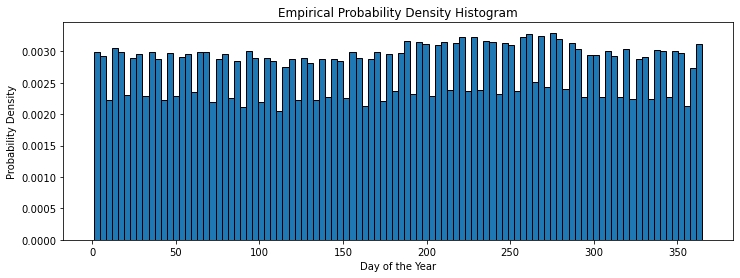

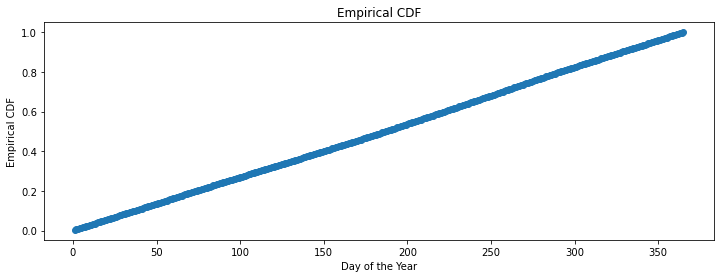

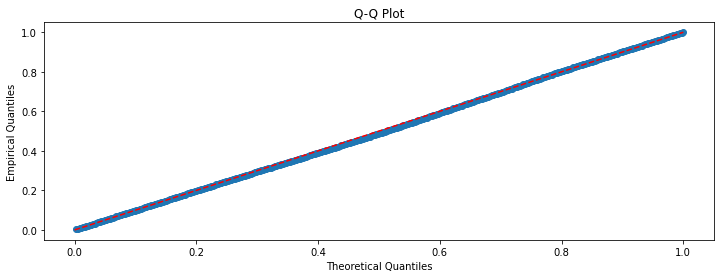

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('bdaydata.txt',sep=' ')
counts = df.values[:,1]
days = list(range(1, 366))
a = np.sum(counts)
# Calculate the empirical probability of each day
empirical_probs = [count / a for count in counts]

# Create an empirical histogram 
plt.figure(figsize=(12, 4))
plt.hist(days, bins=100, weights=counts, density=True, edgecolor='black')
plt.xlabel('Day of the Year')
plt.ylabel('Probability Density')
plt.title('Empirical Probability Density Histogram')
plt.show()


# Calculate the empirical cumulative distribution function (CDF)
empirical_cdf = np.cumsum(empirical_probs)
plt.figure(figsize=(12, 4))
plt.plot(days, empirical_cdf, marker='o', linestyle='-')
plt.xlabel('Day of the Year')
plt.ylabel('Empirical CDF')
plt.title('Empirical CDF')
plt.show()

uniform_probs = np.arange(1, 365 + 1) /365
plt.figure(figsize=(12, 4))

plt.scatter(np.sort(uniform_probs), np.sort(empirical_cdf))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Empirical Quantiles')
plt.title('Q-Q Plot')
plt.show()


___

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

___

## Ans.


NameError: name 'count' is not defined

In [31]:
from scipy import stats
# Perform a Chi-square test

observed_counts = counts
expected_counts = np.full(len(counts), np.sum(counts) / len(counts))

chi2, p_chi2 = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Perform a Kolmogorov-Smirnov test
#uniform_cdf = np.arange(1, 366) / 365.0  # The expected CDF for a uniform distribution
#ks_statistic, p_ks = stats.ks_2samp(empirical_cdf, uniform_cdf)
#ks_statistic, p_ks = stats.kstest(empirical_cdf, uniform_cdf)
ks_statistic, p_ks = stats.kstest(counts, [int(np.sum(counts)/365)]*365 ) 

print(f"Chi-square test statistic: {chi2}")
print(f"Chi-square p-value: {p_chi2}")
print(f"Kolmogorov-Smirnov test statistic: {ks_statistic}")
print(f"Kolmogorov-Smirnov p-value: {p_ks}")

Chi-square test statistic: 1352.7233599950073
Chi-square p-value: 1.2489373800065057e-113
Kolmogorov-Smirnov test statistic: 0.536986301369863
Kolmogorov-Smirnov p-value: 1.4709250126402564e-48


___

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

___

## Ans.


In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the array of [1 * count, 2 * count, ...]
total_data = []
for i in days:
    total_data.append([i]*counts[i-1])
    
# Now, weighted_counts contains the desired array
flattened_list = [item for sublist in total_data for item in sublist]
print(len(flattened_list))

# List to store the results
results = []
lower = []
upper =[]
for n in range(15, 31):
    num_samples = 100 # Number of bootstrap samples (adjust as needed)
    same_birth = []
    for _ in range(num_samples):
        # Randomly sample n elements with replacement from the original list using np.random.choice()
        sample = np.random.choice(flattened_list, n, replace=True)
        
        # Check if all elements in the sample are identical
        if len(sample) != len(set(sample)):
            same_birth.append(1)
        else:
            same_birth.append(0)
            
    # Calculate the proportion of samples with identical elements
    proportion = np.sum(same_birth) / num_samples
    lower.append(proportion - 1.96 * np.std(same_birth)/np.sqrt(num_samples))
    upper.append(proportion + 1.96 * np.std(same_birth)/np.sqrt(num_samples))
    results.append((n, proportion))

# Print or analyze the results
for n, proportion in results:
    print(f"For n={n}, proportion of samples with has same birthday is: {proportion}")

480715
For n=15, proportion of samples with has same birthday is: 0.23
For n=16, proportion of samples with has same birthday is: 0.35
For n=17, proportion of samples with has same birthday is: 0.26
For n=18, proportion of samples with has same birthday is: 0.41
For n=19, proportion of samples with has same birthday is: 0.45
For n=20, proportion of samples with has same birthday is: 0.35
For n=21, proportion of samples with has same birthday is: 0.42
For n=22, proportion of samples with has same birthday is: 0.45
For n=23, proportion of samples with has same birthday is: 0.49
For n=24, proportion of samples with has same birthday is: 0.59
For n=25, proportion of samples with has same birthday is: 0.58
For n=26, proportion of samples with has same birthday is: 0.63
For n=27, proportion of samples with has same birthday is: 0.62
For n=28, proportion of samples with has same birthday is: 0.67
For n=29, proportion of samples with has same birthday is: 0.68
For n=30, proportion of samples w

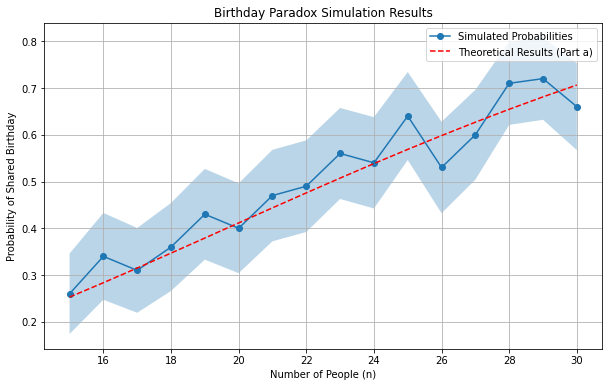

In [91]:
# Plot the estimates, 95% CIs, and theoretical results
plt.figure(figsize=(10, 6))
plt.plot(n_values, np.array(results)[:,1], label='Simulated Probabilities', marker='o')
plt.fill_between(n_values, lower, upper, alpha=0.3)
plt.plot(n_values, theoretical_results, label='Theoretical Results (Part a)', linestyle='--', color='red')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of Shared Birthday')
plt.title('Birthday Paradox Simulation Results')
plt.legend()
plt.grid(True)
plt.show()


The graph above is not alike the graph for part(a), but the overall trends are similar.

___
___

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



___

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials.
___


## Ans.

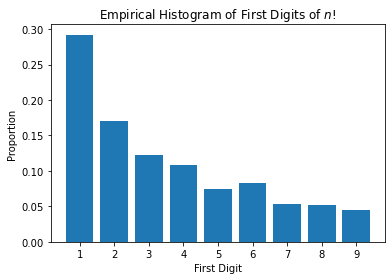

In [65]:
#from scipy.misc import factorial
#fact_series = factorial(np.arange(n),exact=True)
#first_digit = np.zeros(n)
#for i in range(n):
# first_digit[i] = int(str(fact_series[i])[0])

from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt

fact_series = factorial(np.arange(1500),exact=True)
first_digit = np.zeros(1500)
for i in range(1500):
    first_digit[i] = int(str(fact_series[i])[0])

plt.hist(first_digit, bins=9, rwidth=0.8, align='left', range=(1, 10), density=True)
plt.title("Empirical Histogram of First Digits of $n!$")
plt.xlabel("First Digit")
plt.ylabel("Proportion")
plt.xticks(np.arange(1, 10))
plt.show()

Reference: Chatgpt

___
**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

___


## Ans.

In [73]:
from scipy.stats import chisquare
observed_freq = np.histogram(first_digit, bins=9, range=(1, 10))[0]
expected_freq = [1500 / 9] * 9
chisquare_stat, p_value = chisquare(observed_freq, expected_freq)

chisquare_stat, p_value
#Since the p-value is extremely small and approach to 0, it implies the observed
#frequencies are significantly different from the expected frequencies.
print(f'Chi-Square Statistic is: {chisquare_stat}')
print(f'P-value is: {p_value}')
print('Since the p-value is smaller than 0.05, we have evidence to reject null hypothesis')

Chi-Square Statistic is: 670.8000000000002
P-value is: 1.3805718582880795e-139
Since the p-value is smaller than 0.05, we have evidence to reject null hypothesis


___

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


___

In [74]:
import math

def benford_pdf(d):
    return math.log10(d + 1) - math.log10(d)
                                          
Benford_distribution = []
for i in range(1,10):
    p = benford_pdf(i)
    Benford_distribution.append(1500*p)
    
Benford_distribution

chisquare_stat, p_value = chisquare(observed_freq, Benford_distribution)

print(f'Chi-Square Statistic is: {chisquare_stat}')
print(f'P-value is: {p_value}')
print('Since the p-value is larger than 0.05, we do not have evidence to reject null hypothesis')

Chi-Square Statistic is: 9.456569118464648
P-value is: 0.3052548339606756
Since the p-value is larger than 0.05, we do not have evidence to reject null hypothesis


Reference: Chatgpt

___

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.
___

## Ans.

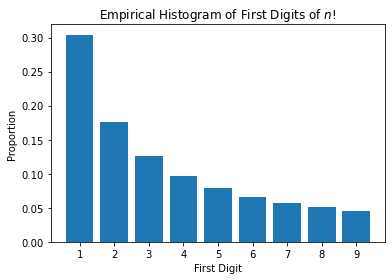

In [75]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('us_pop.csv')

# Now, you have your data in a DataFrame called 'df'
re = np.zeros(100000)
zip_code = df['population'].values
for i in range(100000):
    re[i] = int(str(zip_code[i])[0])
    
plt.hist(re, bins=9, rwidth=0.8, align='left', range=(1, 10), density=True)
plt.title("Empirical Histogram of First Digits of $n!$")
plt.xlabel("First Digit")
plt.ylabel("Proportion")
plt.xticks(np.arange(1, 10))
plt.show()

In [79]:
observed_freq = np.histogram(re, bins=9, range=(1, 10))[0]
expected_freq = [100000 / 9] * 9
chisquare_stat, p_value = chisquare(observed_freq, expected_freq)
print(f'Chi-Square Statistic is: {chisquare_stat}')
print(f'p_value is {p_value} and this is very small therefore we have evidence to reject null hypothesis which is it follows      '
      f'uniform distribution' )

Chi-Square Statistic is: 50323.53572
p_value is 0.0 and this is very small therefore we have evidence to reject null hypothesis which is it follows      uniform distribution


In [80]:
observed_freq = np.histogram(re, bins=9, range=(1, 10))[0]
Benford_distribution = []
for i in range(1,10):
    p = benford_pdf(i)
    Benford_distribution.append(100000*p)
chisquare_stat, p_value = chisquare(observed_freq, Benford_distribution)
chisquare_stat, p_value
print(f'Chi-Square Statistic is: {chisquare_stat}')
print(f'p_value is {p_value} therefore we do not have evidence to reject null hypothesis which is it follows         Benford distribution' )

Chi-Square Statistic is: 11.84322681811079
p_value is 0.15833698137850147 therefore we do not have evidence to reject null hypothesis which is it follows         Benford distribution


Reference: Chatgpt

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.